In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
sns.set_theme('talk', palette=sns.color_palette('Set2'))
import time
pd.options.display.max_columns = 30
pd.options.display.max_colwidth = 150

## train data load

In [2]:
infile = open('..//4_data_preparation_for_training//X_train','rb')
X_train = pkl.load(infile)
infile.close()

infile = open('..//4_data_preparation_for_training//X_test','rb')
X_test = pkl.load(infile)
infile.close()

infile = open('..//4_data_preparation_for_training//y_train','rb')
y_train = pkl.load(infile)
infile.close()

infile = open('..//4_data_preparation_for_training//y_test','rb')
y_test = pkl.load(infile)
infile.close()

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## random forest regressor and grid search

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [4]:
parameters = [{'n_estimators':[30,40,50]}]

In [5]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = parameters,
                           cv = 3,
#                            n_jobs = -1,
                          )

In [6]:
start = time.time()

grid_search = grid_search.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 15.0 min.


In [7]:
grid_search.best_score_

0.8063569124694961

In [8]:
grid_search.best_params_

{'n_estimators': 40}

In [9]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,94.804945,22.035943,0.537382,0.242990,30,{'n_estimators': 30},0.801280,0.808769,0.798802,0.802951,0.004237,3
1,99.212516,26.826420,0.313817,0.102482,40,{'n_estimators': 40},0.802960,0.811581,0.804529,0.806357,0.003749,1
2,82.932383,1.562931,0.311829,0.008969,50,{'n_estimators': 50},0.804784,0.808723,0.804787,0.806098,0.001856,2


In [10]:
start = time.time()

model = RandomForestRegressor(n_estimators = 30, random_state = 0)
model.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 1.0 min.


## model evaluation

In [11]:
from sklearn.metrics import r2_score

In [12]:
predictions = model.predict(X_test)

In [13]:
r2_score(y_test,predictions)

0.8321059135195908

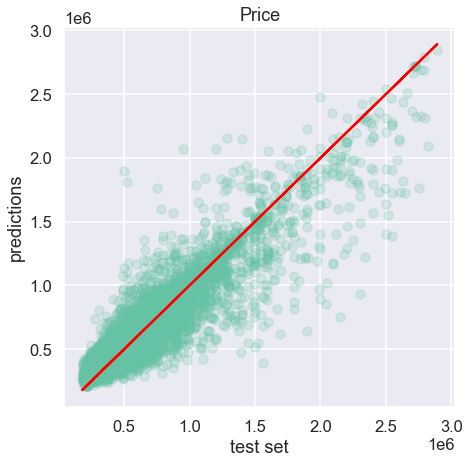

In [14]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(x=y_test, y=predictions, edgecolor=None, alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price')

# Perfect predictions
plt.plot(y_test, y_test ,'r')

In [15]:
errors = y_test - predictions

Text(0.5, 1.0, 'Error distribution')

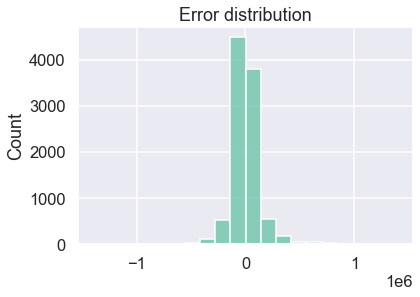

In [25]:
# plt.xlim(-200000,200000)

sns.histplot(errors, bins=20)
plt.title('Error distribution')

Text(0.5, 1.0, 'Errors boxplot')

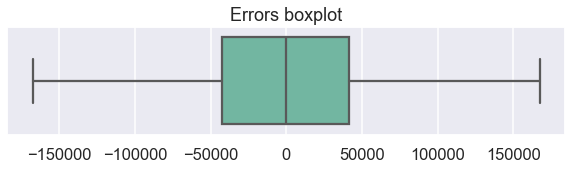

In [27]:
plt.figure(figsize=(10,2))
sns.boxplot(x=errors, showfliers=False)
plt.title('Errors boxplot')

In [17]:
predictions

array([430632.83333333, 507533.33333333, 488263.33333333, ...,
       444996.66666667, 951030.85555556, 532783.33333333])

In [18]:
predictions[:20]/y_test[:20]

array([1.29552597, 1.01710087, 0.91264174, 0.97133921, 1.00173124,
       1.03222046, 1.0133604 , 1.04690117, 1.01705026, 0.94607843,
       1.4087421 , 0.89494624, 1.19963123, 0.96723005, 0.97286313,
       0.98575487, 0.9958668 , 1.0122337 , 0.9948538 , 0.76752916])

## k-Fold Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
start = time.time()

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 6.0 min.


In [21]:
accuracies.mean()

0.8154581132698409

In [22]:
accuracies.std()

0.0047839686882061435

In [23]:
accuracies

array([0.824468  , 0.81193097, 0.8123854 , 0.8121955 , 0.81631069])

## saving data

In [24]:
import joblib
joblib.dump(model, 'random_forest_model')

['random_forest_model']